In [1]:
import sys
sys.path.append('/home/xinyiz/c2p_dag/')

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import gaussian, threshold_otsu
from skimage.transform import resize
from skimage import io
import pickle
from skimage.measure import regionprops

import matplotlib.pyplot as plt
import torch
import time
from sklearn.decomposition import PCA
import pandas as pd
import torchvision
from scipy.stats import ttest_rel,ttest_ind

gh2ax


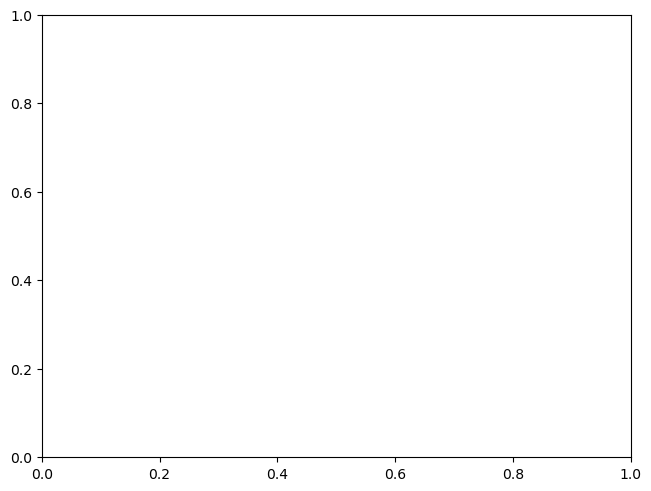

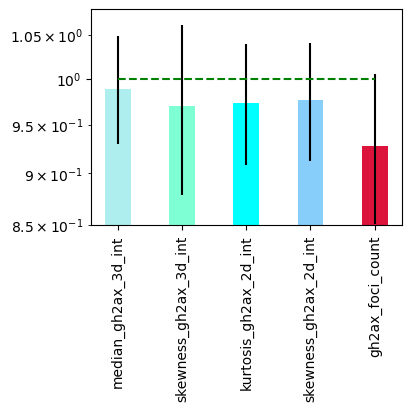

cd4


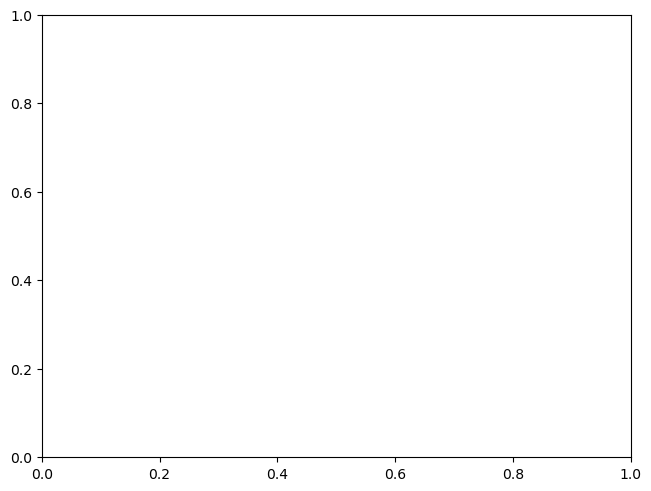

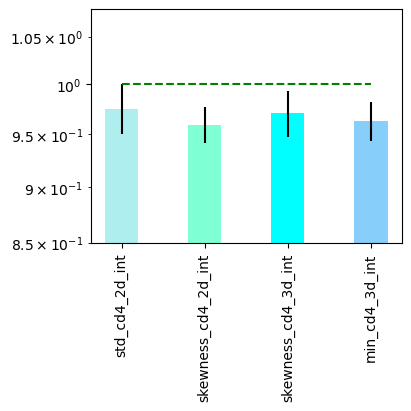

cd8


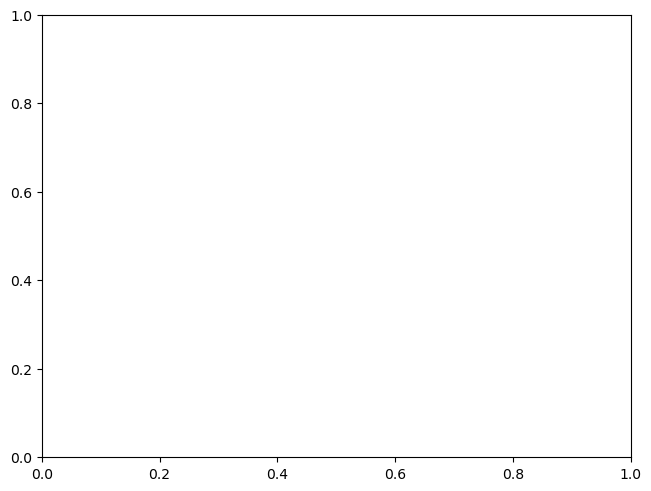

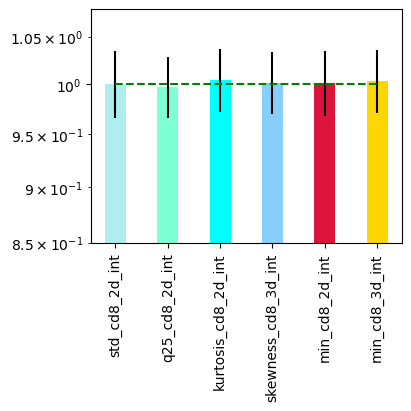

lamin


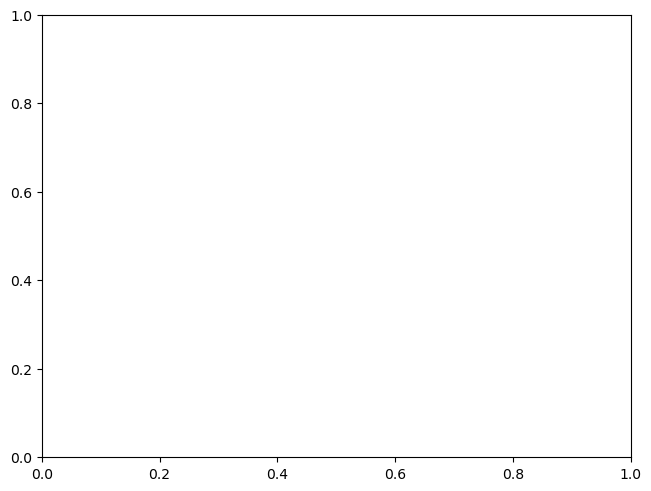

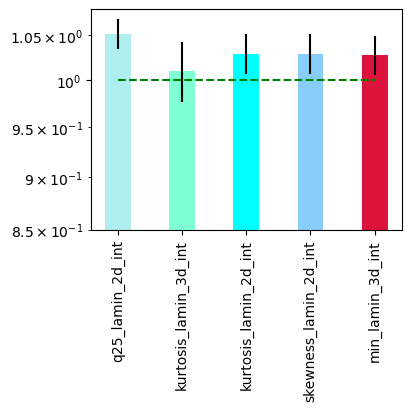

In [33]:
sourceDir='/data/xinyi/c2p/data/chromark'
proteins=np.array(['gh2ax','cd4','cd8','lamin'])

name_train='conditionClf_nmco_sampling'
modelname_train='nmco2cond_fc_l2'
plotsavepath_train=os.path.join('/data/xinyi/c2p/plots/',modelname_train,name_train)

name_train_ablation='conditionClf_nmco_sampling_featureAblation'
modelname_train_ablation='nmco2cond_fc_l2'
plotsavepath_train_ablation=os.path.join('/data/xinyi/c2p/plots/',modelname_train_ablation,name_train_ablation)

colors=['paleturquoise', 'aquamarine', 'cyan', 'lightskyblue', 'crimson', 'gold', 'green']
for p in proteins:
    print(p)
    with open(os.path.join(sourceDir,'ls_cc_mostConnected_'+p), 'rb') as output:
        ls_cc_mostConnected=pickle.load(output)
    
    x=np.arange(len(ls_cc_mostConnected))*0.05
    width=0.02

    fig,ax=plt.subplots(layout='constrained')
    
    mean=np.zeros(x.size)
    std=np.zeros(x.size)
    with open(os.path.join(plotsavepath_train,p,'acc_val'), 'rb') as output:
        correctCount_val=pickle.load(output)
    mean_all=np.mean(correctCount_val)
    std_all=np.std(correctCount_val)
    
    for p_idx in range(x.size):
        nmcoFeature=ls_cc_mostConnected[p_idx]
        
        with open(os.path.join(plotsavepath_train_ablation,p,nmcoFeature,'acc_val'), 'rb') as output:
            correctCount_val=pickle.load(output)
        mean[p_idx]=np.mean(correctCount_val)/mean_all
        std[p_idx]=np.std(correctCount_val)
        
    fig, ax = plt.subplots(layout='constrained',figsize=(4,4))
    bars=ax.bar(x,mean,width,yerr=std, color=colors[:x.size])
    
    ax.set_xticks(x,ls_cc_mostConnected,rotation='vertical')
    ax.set_ylim(0.85,1.08)
    ax.set_yscale('log')
    ax.hlines(y=1,xmin=0,xmax=np.max(x),colors='green',linestyles='dashed')
    plt.savefig(os.path.join(plotsavepath_train,p,'accuracy_val_AblationFC.pdf'))
    plt.show()